<a href="https://colab.research.google.com/github/james-weichert/python-for-ml/blob/main/cs4664_python_for_ml_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://csgrad.cs.vt.edu/assets/logos/vt_inline_ce_computer_science.png" width="50%"/>

# Python for Machine Learning II
### CS 4664 Spring 2025
Notebook by James Weichert


## Introduction

**This (shorter) lab aims to provide a few tips and best practices for working with Python machine learning libraries.** We'll cover arrays and tensors, `sklearn` and `pytorch` basics, and using models from _HuggingFace_.

#### Libraries

The following cell has the Python libraries you'll most likely need for assignments throughout the semester. Your final project might require additional libraries. **Make sure to install the necessary libraries,** either on Colab or locally.

In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import timeit

import torch
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

## 1. Arrays and Tensors

### `numpy` arrays

**`numpy` arrays** (technically [_ndarrays_](https://numpy.org/doc/stable/reference/arrays.ndarray.html)) can hold values **of the same type** in arbitrary sizes and dimensions.

In [ ]:
# this is an array:
my_arr = np.array(["john", "paul", "ringo", "george"])
my_arr

array(['john', 'paul', 'ringo', 'george'], dtype='<U6')

In [ ]:
# as is this:
ones = np.ones(shape=(2,3,4))
ones

array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]])

In [ ]:
# or this
rand_nums = np.random.random(size=(2,3,4))
rand_nums

array([[[0.41129132, 0.86973602, 0.37505225, 0.89870481],
        [0.26154966, 0.37859518, 0.53759799, 0.87201608],
        [0.61256788, 0.92875763, 0.70814273, 0.64383272]],

       [[0.50018235, 0.74302554, 0.71541425, 0.6454553 ],
        [0.13268168, 0.95742624, 0.80114307, 0.13547299],
        [0.72698638, 0.80528846, 0.25232445, 0.8903381 ]]])

As the dimensions of our array (we could also call it a "matrix" or even a "tensor") grow, we will likely want to perform operations along particular **axes** of the data.

`numpy` axes start at 0 and count up. You


<img src="https://foundations-of-ml.ida.liu.se/static/4c35818b350b742fd7255d64bd82868c/75051/3darray.png" width="50%"/>

(from [_Foundations of Machine Learning_](https://foundations-of-ml.ida.liu.se/content/section1/numpy_intro) at Linköping University)

In [ ]:
# let's use the 3D array in the diagram as an example
test_arr = np.array([
    [[3,0,0,5], [3,8,1,2]],
    [[1,2,6,2], [7,2,4,5]],
    [[9,0,2,7], [8,4,5,3]]
])
test_arr

array([[[3, 0, 0, 5],
        [3, 8, 1, 2]],

       [[1, 2, 6, 2],
        [7, 2, 4, 5]],

       [[9, 0, 2, 7],
        [8, 4, 5, 3]]])

Many `numpy` functions accept an `axis=` argument to specify the axis along which to perform the operation.

In [ ]:
# let's try taking the average along axis=0
# the diagram tells us that we should be averaging
# each column of each 2x4 matrix (i.e. each 'slice')
np.mean(test_arr, axis=0)

array([[4.33333333, 0.66666667, 2.66666667, 4.66666667],
       [6.        , 4.66666667, 3.33333333, 3.33333333]])

In [ ]:
# but in the cell above, axis=0 gives us a 2x4 matrix even through
# the diagram suggests we should get a 3x4 matrix like this:
np.mean(test_arr, axis=1)

array([[3. , 4. , 0.5, 3.5],
       [4. , 2. , 5. , 3.5],
       [8.5, 2. , 3.5, 5. ]])

As you can see above, thinking about `numpy` axes according to graphical axes (like in the diagram) can be confusing.

**It might be easier to think about axes as follows:**

1. `axis 0` is the _outermost_ layer of the array. These are the components just inside of the first set of square brackets. In our example, these are the 3 **'slices'** displayed along the "z axis".
2. `axis 1` is the _next outermost_ layer of the array. Look inside one of the components described above (i.e. the 'slices') to find the next set of brackets. In our example, these are the 2 **rows** of each 'slice', displayed along the "y axis".
3. `axis 2` is the _next outermost_ layer of the array. Look inside one of the components described above (i.e the 'rows') to find the next set of brackets. In our example, we reach the innermost part of the array, describing the values in each of the 4 **columns** for the given row, displayed along the "x axis".
4. `axis n` continues the above pattern.

Using this pattern, if you know your array is arranged so that the outermost layer represents a variable like _time_ or _batches_, then you usually want to perform operations using `axis=0`.

In [ ]:
# ...or you can just throw all of the array structure in the trash...
np.mean(test_arr)

np.float64(3.7083333333333335)

### `torch` tensors

**Tensors** are conceptually equivalent to arrays; both data types store values (usually numbers) of the same type in arbitrary dimensions. Mathematically a "tensor" is a generalization for scalars (rank 0 tensor), vectors (rank 1 tensor), matrices (rank 2 tensor), and the like.

The key functional difference between tensors and arrays is that tensors can run on GPUs, significantly improving efficiency for large-scale matrix operations.

[The following is adapted from the `pytorch` ["Tensors" guide](https://pytorch.org/tutorials/beginner/basics/tensorqs_tutorial.html)]

In [ ]:
# we'll be using `torch` (a.k.a PyTorch) for making tensors
my_favorite_numbers = [[3, 7],[18, 21]]
fav_tensor = torch.tensor(my_favorite_numbers)
fav_tensor

tensor([[ 3,  7],
        [18, 21]])

In [ ]:
# there's a special way to convert np arrays to tensors
np_tensor = torch.from_numpy(test_arr)
np_tensor

tensor([[[3, 0, 0, 5],
         [3, 8, 1, 2]],

        [[1, 2, 6, 2],
         [7, 2, 4, 5]],

        [[9, 0, 2, 7],
         [8, 4, 5, 3]]])

In [ ]:
# note the difference between this
test_arr.shape

(3, 2, 4)

In [ ]:
# and this
np_tensor.shape

torch.Size([3, 2, 4])

A key property of `torch` tensors (and with `torch` in general) is where the data stored. Each tensor has a `.device` attribute:

In [ ]:
fav_tensor.device

device(type='cpu')

Right now, we're just creating tensors on our CPU, so there won't be any efficiency improvement.

To illustrate the power of tensors, let's time how long it takes to perform a matrix multiplication on two 100x100x100 matrices:

In [ ]:
# run this to create our timing setup
def time_matmul(mat_a, mat_b):
    start_time = timeit.default_timer()

    mat_a @ mat_b

    return timeit.default_timer() - start_time

In [ ]:
# we'll use the same values for the array and tensor versions
a = np.random.random((100,100,100))
b = np.random.random((100,100,100))

In [ ]:
# time for numpy to do this matrix multiplication
time_matmul(a, b)

0.015013610000096378

In [ ]:
# now we convert these arrays to tensors
large_tensor_a = torch.from_numpy(a)
large_tensor_b = torch.from_numpy(b)

In [ ]:
# and time it again
time_matmul(large_tensor_a, large_tensor_b)

0.06435261600017839

Currently, tensor multiplication is even slower than `numpy`!

**But what happens when we activate ~ turbo mode ~ (a.k.a use a GPU)?**

<img src="https://ih1.redbubble.net/image.1175380230.9271/bg,f8f8f8-flat,750x,075,f-pad,750x1000,f8f8f8.u2.jpg" width="30%"/>

To take advantage of tensors, we need to configure `torch` to use a GPU.

**First, change the Google Colab runtime by clicking `Runtime > Change runtime type > T4 GPU`**

Then run the cell below. The device should now be "cuda".

In [ ]:
# check that the GPU is detected
assert torch.cuda.is_available()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

device

device(type='cuda')

Now we can move the tensors to the GPU:

In [ ]:
# .to(device) does not mutate the original tensor!
gpu_tensor_a = large_tensor_a.to(device)
gpu_tensor_b = large_tensor_b.to(device)

In [ ]:
time_matmul(large_tensor_a, large_tensor_b)

0.01042727100002594

Ok, some improvement, but we still haven't seen a big advantage to tensors over arrays. So we need to scale up

In [ ]:
c = np.random.random((500,500,500))
d = np.random.random((500,500,500))
# these matrices are 125 times larger

In [ ]:
time_matmul(c, d)

4.801980378999815

In [ ]:
larger_tensor_c = torch.from_numpy(c)
larger_tensor_d = torch.from_numpy(d)

In [ ]:
larger_tensor_c.device

device(type='cpu')

In [ ]:
time_matmul(larger_tensor_c, larger_tensor_d)

4.053815079999822

In [ ]:
gpu_tensor_c = larger_tensor_c.to(device)
gpu_tensor_d = larger_tensor_d.to(device)

In [ ]:
gpu_tensor_c.device

device(type='cuda', index=0)

In [ ]:
time_matmul(gpu_tensor_c, gpu_tensor_d)

0.1737997280001764

**wow!**

<img src="https://media.licdn.com/dms/image/v2/D4D22AQFUU1PbA0mp9w/feedshare-shrink_800/B4DZStS1JsHUAg-/0/1738074183204?e=2147483647&v=beta&t=iZDTyYulD8_dl0Ng5uNiJpvj5dE6b_GGZ5LoKmY0IcY" width="30%"/>

## 2. `sklearn` and `pytorch`

### `sklearn`

`sklearn` is a great resource for 'classical' machine learning models (e.g. regression, decision trees) and utilities (e.g. cross validation).

Each `sklearn` ML model is a class, and most models use the same overall process for training and testing:

1. Create an instance of the class (and specify key hyperparameters)
2. Use `model.fit(X, y)` to train the model
3. Use `model.predict(X_test)` to predict y values from the test data
4. Use `model.score(X_test, y_test)` to find the accuracy of your model's predictions and the ground truth values

#### Our Data

**I've been stricken with March Madness fever!**

The `cbb` table contains statistics on men's college basketball teams between 2013 and 2024. Let's see how far we can use this data to help us select our bracket winners for this year...

In [62]:
cbb = pd.read_csv("https://github.com/james-weichert/python-for-ml/blob/main/ml2/cbb.csv?raw=true")
cbb

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3880,Stonehill,NEC,30,4,90.3,114.2,0.0629,46.7,52.7,19.5,...,29.4,47.9,51.7,30.1,35.9,68.1,-22.0,NaN,NaN,2024
3881,St. Francis PA,NEC,28,8,93.1,118.1,0.0608,47.2,53.0,21.2,...,35.4,45.7,52.9,33.2,35.4,65.4,-18.6,NaN,NaN,2024
3882,IUPUI,Horz,29,6,92.1,116.9,0.0607,46.5,58.2,21.3,...,33.4,49.5,59.0,24.7,38.0,67.3,-21.6,NaN,NaN,2024
3883,Coppin St.,MEAC,29,2,85.1,111.1,0.0445,42.1,51.3,22.9,...,38.3,41.9,51.0,28.3,34.5,66.3,-22.9,NaN,NaN,2024


In [60]:
non_champions = cbb[cbb['POSTSEASON'] != 'Champions']
champions = cbb[cbb['POSTSEASON'] == 'Champions']

In [70]:
cbb['Champions?'] = cbb['POSTSEASON'] == 'Champions'

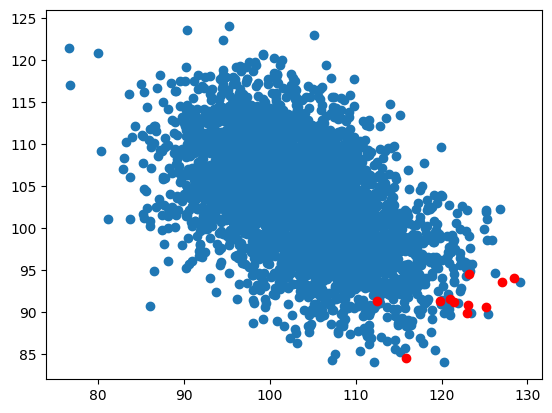

In [63]:
plt.scatter(non_champions["ADJOE"], non_champions["ADJDE"])
plt.scatter(champions["ADJOE"], champions["ADJDE"], c='red')

In [72]:
from sklearn.linear_model import LogisticRegression

In [79]:
X = cbb.drop(['TEAM', 'CONF', 'POSTSEASON', 'SEED', 'YEAR', 'Champions?'], axis=1)
X

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB
0,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,18.2,40.7,30.0,32.3,30.4,53.9,44.6,32.7,36.2,71.7,8.6
1,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,15.8,32.1,23.7,36.2,22.4,54.8,44.7,36.5,37.5,59.3,11.3
2,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,19.5,25.5,24.9,30.7,30.0,54.7,46.8,35.2,33.2,65.9,6.9
3,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,22.8,27.4,28.7,32.9,36.6,52.8,41.9,36.5,29.7,67.5,7.0
4,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,17.1,30.0,26.2,39.0,26.9,56.3,40.0,38.2,29.0,71.5,7.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3880,30,4,90.3,114.2,0.0629,46.7,52.7,19.5,16.6,22.5,31.0,22.6,29.4,47.9,51.7,30.1,35.9,68.1,-22.0
3881,28,8,93.1,118.1,0.0608,47.2,53.0,21.2,17.1,32.9,31.3,32.6,35.4,45.7,52.9,33.2,35.4,65.4,-18.6
3882,29,6,92.1,116.9,0.0607,46.5,58.2,21.3,18.5,30.0,35.5,33.2,33.4,49.5,59.0,24.7,38.0,67.3,-21.6
3883,29,2,85.1,111.1,0.0445,42.1,51.3,22.9,21.8,27.0,38.6,31.1,38.3,41.9,51.0,28.3,34.5,66.3,-22.9


In [80]:
y = cbb['Champions?']
y

,Champions?
0,False
1,False
2,False
3,False
4,False
...,...
3880,False
3881,False
3882,False
3883,False


In [82]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X, y)

LogisticRegression(max_iter=1000)

In [83]:
lr_model.score(X, y)

0.9984555984555985

##### Ex 2.1 Test Your Knowledge!

**Why is the model accuracy so high?**

###### Ans 2.1

There is an _extreme_ class imbalance in the data, so it's easy to get a very high accuracy just by predicting the majority class (that the team does not win March Madness)

In [88]:
baseline_accuracy = (len(cbb) - len(champions)) / len(cbb)
baseline_accuracy

0.9971685971685972

A better performance metric is the [**F1 Score**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html), which weighs true positive predictions against false positives and false negatives:

In [84]:
from sklearn.metrics import f1_score

In [85]:
f1_score(y, lr_model.predict(X))

0.625

#### Let's Test Our Model

In [89]:
cbb25 = pd.read_csv("https://github.com/james-weichert/python-for-ml/blob/main/ml2/cbb25.csv?raw=true")
cbb25

,RK,Team,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,...,FTRD,2P_O,2P_D,3P_O,3P_D,3PR,3PRD,ADJ_T,WAB,SEED
0,1,Houston,B12,34,30,124.8,88.0,0.9823,52.7,44.9,...,34.1,49.0,43.9,39.8,30.9,34.5,43.1,61.4,11.6,1.0
1,2,Duke,ACC,34,31,128.5,91.3,0.9807,57.4,44.5,...,25.4,58.0,43.4,37.7,30.9,45.4,37.9,65.7,9.6,1.0
2,3,Auburn,SEC,33,28,129.0,93.7,0.9756,55.7,46.0,...,39.2,56.1,47.2,36.8,29.2,40.6,34.8,67.8,12.5,1.0
3,4,Florida,SEC,34,30,127.7,94.0,0.9713,55.0,45.3,...,33.0,56.4,45.9,35.5,29.6,43.6,37.3,69.5,11.1,1.0
4,5,Alabama,SEC,33,25,127.6,96.4,0.9621,56.3,47.9,...,33.9,59.7,48.8,35.0,30.8,46.2,35.1,74.6,9.8,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,360,The Citadel,SC,30,5,93.6,117.5,0.0687,46.9,54.5,...,32.8,49.5,56.3,29.2,34.7,45.2,42.7,64.5,-21.5,NaN
360,361,Chicago St.,NEC,32,4,92.5,116.1,0.0682,44.4,54.9,...,36.9,43.4,55.7,30.6,35.8,40.9,39.4,68.5,-21.8,NaN
361,362,Coppin St.,MEAC,30,6,87.8,112.4,0.0550,44.0,55.6,...,37.1,44.2,56.3,29.0,36.3,32.1,38.8,67.9,-19.0,NaN
362,363,Arkansas Pine Bluff,SWAC,31,6,95.0,121.7,0.0549,50.3,56.3,...,40.5,52.6,58.5,31.0,35.7,37.9,44.9,71.6,-20.1,NaN


In [94]:
contenders = cbb25[cbb25['SEED'] > 0]

In [96]:
contenders_X = contenders.drop(['Team', 'CONF', 'SEED', 'RK', '3PR', '3PRD'], axis=1)
contenders_X

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB
0,34,30,124.8,88.0,0.9823,52.7,44.9,14.6,21.7,36.1,29.3,28.2,34.1,49.0,43.9,39.8,30.9,61.4,11.6
1,34,31,128.5,91.3,0.9807,57.4,44.5,14.4,17.7,35.2,26.5,32.1,25.4,58.0,43.4,37.7,30.9,65.7,9.6
2,33,28,129.0,93.7,0.9756,55.7,46.0,13.4,17.4,34.3,30.3,33.5,39.2,56.1,47.2,36.8,29.2,67.8,12.5
3,34,30,127.7,94.0,0.9713,55.0,45.3,15.0,17.0,38.1,28.8,32.6,33.0,56.4,45.9,35.5,29.6,69.5,11.1
4,33,25,127.6,96.4,0.9621,56.3,47.9,16.7,13.5,34.7,29.2,40.1,33.9,59.7,48.8,35.0,30.8,74.6,9.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,33,22,101.3,105.7,0.3796,48.9,47.5,17.1,17.3,31.8,29.1,33.1,33.2,47.8,46.3,34.0,33.0,65.8,-7.8
242,34,22,101.2,107.4,0.3354,51.8,52.1,16.8,17.6,23.8,27.4,29.5,34.1,51.1,53.1,35.1,33.6,63.4,-8.3
262,34,22,99.4,107.5,0.2903,51.0,48.0,21.7,15.9,31.1,28.3,31.0,26.7,50.1,48.7,34.9,31.4,67.3,-8.2
273,34,19,100.5,109.6,0.2698,47.1,50.3,13.2,18.6,28.3,31.1,29.9,38.7,45.4,50.4,32.9,33.4,67.6,-10.2


In [102]:
contenders['Predict Winner?'] = lr_model.predict(contenders_X)
contenders

<ipython-input-102-b87ba71156ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contenders['Predict Winner?'] = lr_model.predict(contenders_X)


,RK,Team,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,...,2P_O,2P_D,3P_O,3P_D,3PR,3PRD,ADJ_T,WAB,SEED,Predict Winner?
0,1,Houston,B12,34,30,124.8,88.0,0.9823,52.7,44.9,...,49.0,43.9,39.8,30.9,34.5,43.1,61.4,11.6,1.0,True
1,2,Duke,ACC,34,31,128.5,91.3,0.9807,57.4,44.5,...,58.0,43.4,37.7,30.9,45.4,37.9,65.7,9.6,1.0,False
2,3,Auburn,SEC,33,28,129.0,93.7,0.9756,55.7,46.0,...,56.1,47.2,36.8,29.2,40.6,34.8,67.8,12.5,1.0,False
3,4,Florida,SEC,34,30,127.7,94.0,0.9713,55.0,45.3,...,56.4,45.9,35.5,29.6,43.6,37.3,69.5,11.1,1.0,False
4,5,Alabama,SEC,33,25,127.6,96.4,0.9621,56.3,47.9,...,59.7,48.8,35.0,30.8,46.2,35.1,74.6,9.8,2.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,218,SIU Edwardsville,OVC,33,22,101.3,105.7,0.3796,48.9,47.5,...,47.8,46.3,34.0,33.0,36.3,38.6,65.8,-7.8,16.0,False
242,243,American,Pat,34,22,101.2,107.4,0.3354,51.8,52.1,...,51.1,53.1,35.1,33.6,44.8,35.7,63.4,-8.3,16.0,False
262,263,Mount St. Mary's,MAAC,34,22,99.4,107.5,0.2903,51.0,48.0,...,50.1,48.7,34.9,31.4,41.0,44.5,67.3,-8.2,16.0,False
273,274,Alabama St.,SWAC,34,19,100.5,109.6,0.2698,47.1,50.3,...,45.4,50.4,32.9,33.4,42.9,39.5,67.6,-10.2,16.0,False


In [129]:
top_10 = contenders.iloc[:10]
top_10

,RK,Team,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,...,2P_O,2P_D,3P_O,3P_D,3PR,3PRD,ADJ_T,WAB,SEED,Predict Winner?
0,1,Houston,B12,34,30,124.8,88.0,0.9823,52.7,44.9,...,49.0,43.9,39.8,30.9,34.5,43.1,61.4,11.6,1.0,True
1,2,Duke,ACC,34,31,128.5,91.3,0.9807,57.4,44.5,...,58.0,43.4,37.7,30.9,45.4,37.9,65.7,9.6,1.0,False
2,3,Auburn,SEC,33,28,129.0,93.7,0.9756,55.7,46.0,...,56.1,47.2,36.8,29.2,40.6,34.8,67.8,12.5,1.0,False
3,4,Florida,SEC,34,30,127.7,94.0,0.9713,55.0,45.3,...,56.4,45.9,35.5,29.6,43.6,37.3,69.5,11.1,1.0,False
4,5,Alabama,SEC,33,25,127.6,96.4,0.9621,56.3,47.9,...,59.7,48.8,35.0,30.8,46.2,35.1,74.6,9.8,2.0,False
5,6,Tennessee,SEC,34,27,119.3,91.1,0.9570,52.8,44.4,...,54.1,46.7,34.0,27.8,43.0,45.1,63.8,9.3,2.0,False
6,7,Texas Tech,B12,33,25,126.0,96.7,0.9546,55.5,48.0,...,54.3,48.2,37.9,31.7,44.6,34.1,65.6,5.8,3.0,False
7,8,Iowa St.,B12,33,24,118.9,92.3,0.9481,54.6,48.4,...,55.1,47.5,35.8,33.2,36.9,40.7,68.5,5.4,3.0,False
8,9,Arizona,B12,34,22,123.9,96.5,0.9469,52.9,48.6,...,55.1,47.2,32.4,33.6,34.6,41.9,69.9,5.4,4.0,False
9,10,Maryland,B10,33,25,117.8,92.0,0.9449,53.8,47.0,...,52.7,47.6,37.2,30.7,35.5,35.8,69.8,4.6,4.0,False


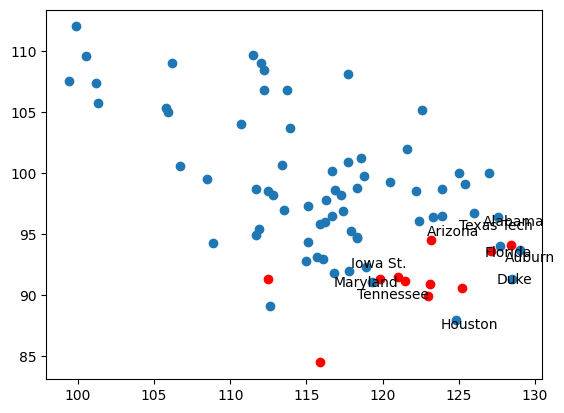

In [145]:
fig, ax = plt.subplots()

ax.scatter(contenders['ADJOE'], contenders['ADJDE'])
ax.scatter(champions['ADJOE'], champions['ADJDE'], c='red')

top_10 = contenders.iloc[:10]

for i, text in enumerate(top_10['Team']):
    ax.annotate(text, (top_10['ADJOE'][i] - 1, top_10['ADJDE'][i] - 1 + np.random.normal(0, 0.5)))

### `pytorch`

`pytorch` is useful for building neural networks by stringing together custom layers.

[The following is adapted from the `pytorch` ["Learn the Basics" guide](https://pytorch.org/tutorials/beginner/basics/intro.html)]

In [146]:
# remember to use a GPU to significantly speed up computation!
assert torch.cuda.is_available()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

`pytorch` neural network function is organized in the module `nn`

In [147]:
from torch import nn

We'll modify the `pytorch` tutorial to use the classic [`MNIST`](https://en.wikipedia.org/wiki/MNIST_database#:~:text=The%20MNIST%20database%20(Modified%20National,the%20field%20of%20machine%20learning.) digit classification dataset.

We can use `torchvision.datasets` to load our training and test data.

In [149]:
training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 9.91M/9.91M [00:02<00:00, 4.43MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 56.8kB/s]
100%|██████████| 1.65M/1.65M [00:06<00:00, 240kB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 10.3MB/s]


Each item in the data is a tuple containing the raw greyscale image data (28 x 28) and the corresponding digit label.

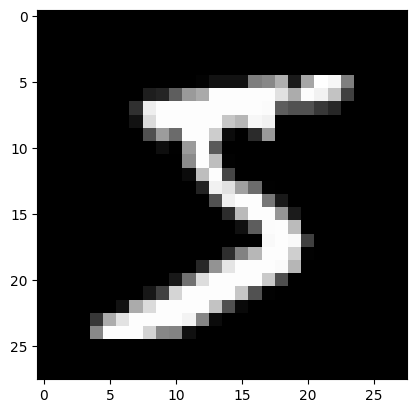

In [152]:
plt.imshow(training_data[0][0].squeeze(), cmap="gray")

A `nn` neural network is a class that extends `nn.Module`. The class requires an `__init__` function, where you define the structure of the network, and a `forward` method.

In [186]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

`nn.Sequential` defines a simple feed-forward neural network (i.e. without recurring or convolutional elements). Each argument is a layer, so our network is as follows:

1. Input layer of $28 * 28 = 784$ neurons
2. A `Linear` layer to transition from 784 in the first (input) layer to 512 neurons in the second (first hidden layer)
3. The hidden layer activation is a `ReLU`
4. Another `Linear` hidden layer of size 512
5. Another `ReLU` activation
6. A final linear transformation from the second hidden layer (512 neurons) to the output layer (10 neurons)


We'll use `torch.utils.data.DataLoader` to segment the data into batches to take advantage of paralell processing.

In [187]:
batch_size = 64

train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

In [188]:
# let's define a loss function against which to optimize
loss_fn = nn.CrossEntropyLoss()

In [189]:
# stochastic gradient descent (SGD) is a good option for simple optimization
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

We have to manually create a training loop, but this is useful if we want to customize anything...

In [190]:
size = len(train_dataloader.dataset)

# sets model to training mode
model.train()

epochs = 10

for _ in range(epochs):

    print("=== Epoch {epoch}===")

    for batch, (X,y) in enumerate(train_dataloader):
        pred = model(X)
        loss = loss_fn(pred, y)

        # perform backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 500 == 0:
            loss, current = loss.item(), batch * batch_size + len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

=== Epoch {epoch}===
loss: 2.299367  [   64/60000]
loss: 2.283809  [32064/60000]
=== Epoch {epoch}===
loss: 2.251930  [   64/60000]
loss: 2.234605  [32064/60000]
=== Epoch {epoch}===
loss: 2.186071  [   64/60000]
loss: 2.155446  [32064/60000]
=== Epoch {epoch}===
loss: 2.076475  [   64/60000]
loss: 2.013023  [32064/60000]
=== Epoch {epoch}===
loss: 1.890302  [   64/60000]
loss: 1.768513  [32064/60000]
=== Epoch {epoch}===
loss: 1.616486  [   64/60000]
loss: 1.437921  [32064/60000]
=== Epoch {epoch}===
loss: 1.322382  [   64/60000]
loss: 1.126750  [32064/60000]
=== Epoch {epoch}===
loss: 1.093562  [   64/60000]
loss: 0.904902  [32064/60000]
=== Epoch {epoch}===
loss: 0.936438  [   64/60000]
loss: 0.757874  [32064/60000]
=== Epoch {epoch}===
loss: 0.826772  [   64/60000]
loss: 0.658825  [32064/60000]


After training, we can evaluate our model's performance on the test set:

In [193]:
# set model to evaluation mode
model.eval()

correct = 0

for X, y in test_dataloader:
    pred = model(X)

    correct += (pred.argmax(1) == y).type(torch.float).sum().item()

accuracy = correct / len(test_dataloader.dataset)
accuracy

0.843

Not _too_ bad. Although the best models on the [Kaggle MNIST Digit Recognizer Competition](https://www.kaggle.com/competitions/digit-recognizer/leaderboard) leaderboard achieve 100% accuracy!

## 3. HuggingFace 🤗 Models

[HuggingFace](https://huggingface.co/) 🤗 is an open source (ish) platform for sharing machine learning models (there are currently over 1.5m models on the website). The platform is especially useful if you want to play around with state-of-the-art models like _GPT_, _Llama_, or _DeepSeek_. **Note that for many popular models you will need to register with HuggingFace and link your account to your notebook** Read more about gated models [here](https://huggingface.co/docs/hub/en/models-gated).

For today, we'll use the "old" GPT2 LLM.

[This section is inspired by a VT [CS 5624](https://tuvllms.github.io/nlp-spring-2025/) homework notebook by Tu Vu and Rishab Balasubramanian]

In [197]:
# confirm GPU is detected
assert torch.cuda.is_available()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

The HuggingFace 🤗 `transformers` library allows for easy integration of their models into Python notebooks.

In [196]:
from transformers import AutoTokenizer, AutoModelForCausalLM

Run the following cell to import the tokenizer and model for GPT2.

In [231]:
tokenizer = AutoTokenizer.from_pretrained("gpt2")
model = AutoModelForCausalLM.from_pretrained("gpt2").to(device)

if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token

We'll use an _Encoder-Decoder_ structure to generate text using GPT. We first encode our `prompt` text into the model's embedding space (using the GPT `tokenizer`), then pass these tokens through GPT, then decode the generated tokens back to English text.

In [252]:
prompt = "Which team will win the March Madness NCAA basketball tournament this year?"

input_ids = tokenizer(prompt, return_tensors='pt').input_ids.to(device)

gen_tokens = model.generate(
    input_ids,
    do_sample=True,
    temperature=0.9,
    max_length=100,
    pad_token_id=tokenizer.pad_token_id
)
gen_text = tokenizer.batch_decode(gen_tokens)[0]

In [253]:
print(gen_text)

Which team will win the March Madness NCAA basketball tournament this year?

The NBA announced Thursday that the 2014-15 season will end for 2016-17. The league announced the teams Thursday.

"While it's always a sad day when the only other non-basketball team in the NCAA is still going through another disappointing season, we have a lot of great players in our sport who are still working hard because they want to play in the NBA," said NBA Commissioner Adam Silver. "Over




---




## Helpful Stuff

### [Python](https://docs.python.org/3/)

| Feature | Use | Note | Example |
| ---| --- | --- | --- |
| Scientific Notation | `1.2e10` | Python natively supports `e` as a keyword for scientific notation. | |
| String Splitting | `str.split(delim)` | Splits a string into an array of substrings based on a delimiter. | `'Hello, James'.split(',')` returns `['Hello', ' James']` |
| Joining Strings | `delim.join(lst)` | Joins an iterable (list, array) of substrings together with a delimiter in between. | `"#".join(['Apples', 'Bananas', 'Oranges'])` returns `'Apples#Bananas#Oranges'` |


### [Pandas](https://pandas.pydata.org/docs/)

| Feature | Use | Note | Example |
| --- | --- | --- | --- |
| Dropping | `df.drop(names_or_idx, axis)` | Drop (remove) row(s)/column(s) from a dataframe (by default, copies the df). <br> `axis=0` looks to drop rows, while `axis=1` looks to drop columns.| `df.drop('col1', axis=1)` returns `df` without the `col1` column. <br> `df.drop('col1')` causes an error because there is no row with the index `col1`. |
| Selecting Rows | `df[cond]` | Filter the dataframe to rows where a condition is met (see [`loc`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html)). <br> `cond` should be a list of booleans indicating whether each row should be selected. | `df[df['col1'] > 10]` returns only the rows in `df` where the `col1` <br> value is greater than 10. |

### [Numpy](https://numpy.org/doc/2.0/)

| Feature | Use | Note | Example |
| --- | --- | --- | --- |
| Axis | `np.fn(..., axis=0, ...)` | Specifies which direction to apply the function. <br> For numpy, `axis=0` applies to each column and `axis=1` applies to each row. | For `a = np.array([[2,3],[4,5]])`, <br> `a.mean(axis=0)` returns `[3,4]`, `a.mean(axis=1)` returns `[2.5, 4.5]`, <br> and `a.mean()` returns `3.5` |
| Random | `np.random...` | There are a variety of random number generators available from the `np.random` module. <br> Consult the [documentation](https://numpy.org/doc/stable/reference/random/index.html) for details. | `np.random.choice([2,3], size=10)` returns an array of 10 randomly <br> sampled values from the list, in this case either 2 or 3. |
| Stacking | `np.hstack(arr_list)`, `np.vstack(arr_list)` | Stacks (appends) arrays either horizontally or vertically. | For `a = np.array([[1,2],[3,4]])` and `b = np.array([5,6],[7,8]])`, <br>`np.hstack([a,b])` returns `[[1,2,5,6],[3,4,7,8]]` <br> and `np.vstack([a,b])` returns `[[1,2],[3,4],[5,6],[7,8]]`. |
| Ones/Zeros | `np.ones((m,n))`, `np.zeros(n)` | Creates an array of ones/zeros of the specified shape. | `np.ones((2,3))` returns `array([[1., 1., 1.],[1., 1., 1.]])` and <br> `np.zeros(4)` returns `array([0., 0., 0., 0.])` |


### [Scikit-Learn](https://scikit-learn.org/stable/user_guide.html)

The following methods work for _many_ `sklearn` ML models:

| Method | Note |
| --- | --- |
|`model.fit(X, y)` | Train the model using training input matrix `X` and labels/targets `y`. |
|`model.predict(X)` | After training, test the model with new input data `X`. Will return the model's predictions for each row in `X`. |
| `model.get_params()` | Returns model parameters. |
| `model.score(X, y)` | Returns the $R^2$ coefficient of determination for the predictions using `X` (checked against ground-truth `y`). |